<font size="10">Latihan 1</font>


In [46]:
import cv2 # OpenCV
import numpy as np # NumPy
from matplotlib import pyplot as plt # Matplotlib
def get_pixel(img, center, x, y): 
    new_value = 0 
    try:
        if img[x][y] >= center: 
            new_value = 1
    except :
        pass 
    return new_value 

In [47]:
def lbp_calculated_pixel(img, x, y):

    '''
    Format :
64 | 128 | 1
------------
64 |  0  | 2
------------
16 |  8  | 4
'''
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top

    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
            val += val_ar[i] * power_val[i]
    return val

In [48]:
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel) 
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
            
plt.show()  

C:\Users\Haekala\AppData\Local\Temp\ipykernel_3888\3868193137.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


LBP Program selesai


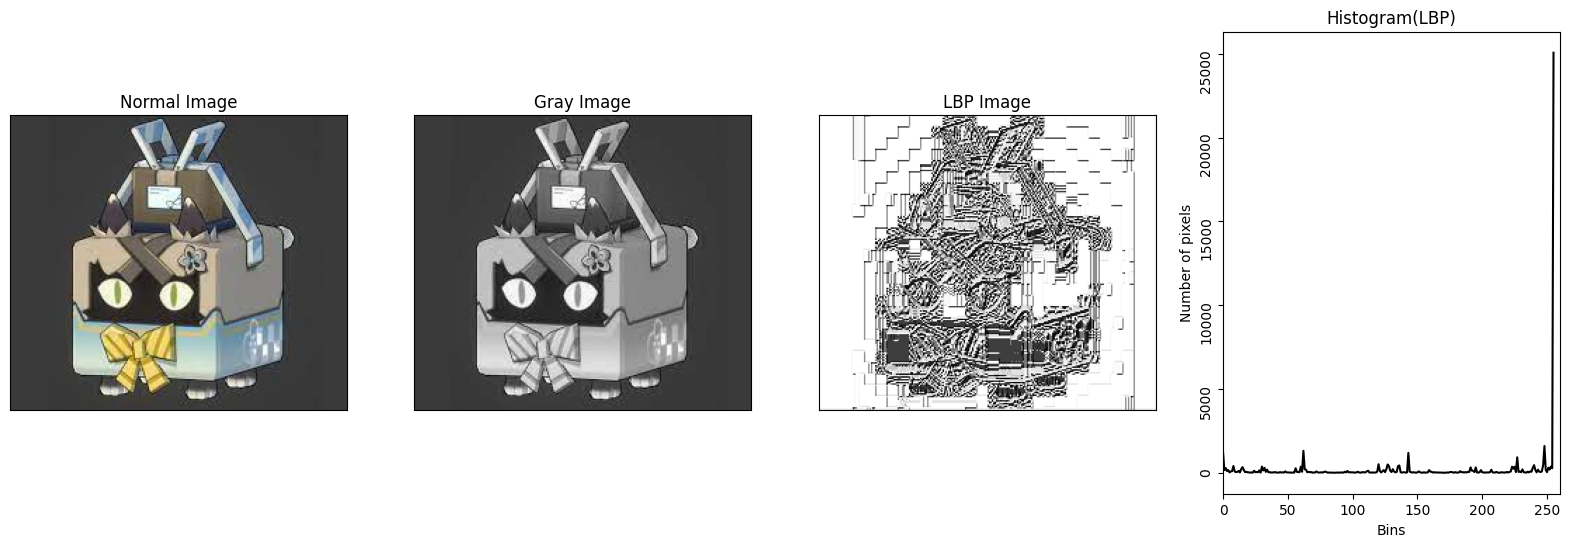

In [49]:
image_file = 'kucing.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_lbp = np.zeros((height, width, 3), np.uint8)

for i in range(0, height):
    for j in range(0, width):
        img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])

output_list = []
output_list.append({
    "img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Normal Image",
    "type": "normal"
})

output_list.append({
    "img": img_gray,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "Gray Image",
    "type": "gray"
})

output_list.append({
    "img": img_lbp,
    "xlabel": "",
    "ylabel": "",
    "xtick": [],
    "ytick": [],
    "title": "LBP Image",
    "type": "gray"
})

output_list.append({
    "img": hist_lbp,
    "xlabel": "Bins",
    "ylabel": "Number of pixels",
    "xtick": None,
    "ytick": None,
    "title": "Histogram(LBP)",
    "type": "histogram"
})

show_output(output_list)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program selesai")


C:\Users\Haekala\AppData\Local\Temp\ipykernel_3888\3868193137.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


LBP Program selesai 


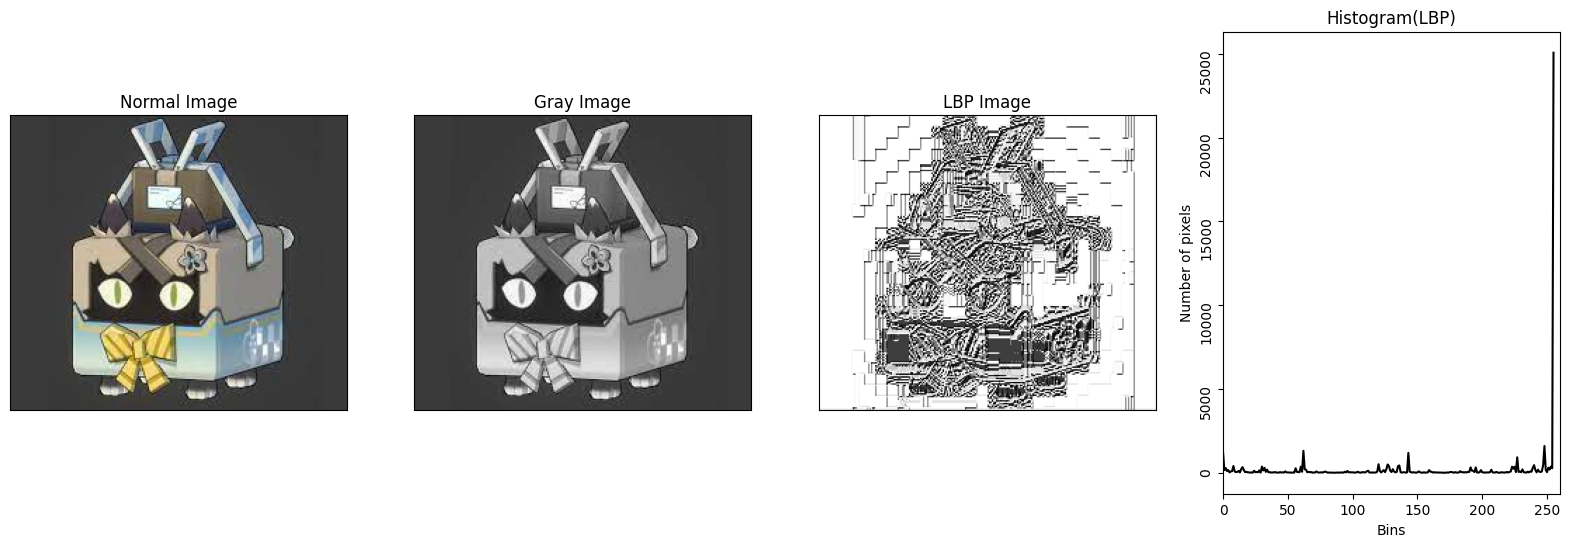

In [50]:
def brighter(nilai, img):
    img_b = np.zeros((height, width,3), np.uint8)
    for y in range(0, height):
        for x in range(0, width):
            red = img[y][x][2] + nilai
            green = img[y][x][1] + nilai
            blue = img[y][x][0] + nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_b[y][x] = (red, green, blue)
    return img_b
image_file = 'kucing.jpg'
image_file2 = 'mikir.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(brighter(50, img_bgr), cv2.COLOR_BGR2GRAY)
img_bgr2 = cv2.imread(image_file2)
height2, width2, channel2 = img_bgr2.shape
img_gray3 = cv2.cvtColor(img_bgr2, cv2.COLOR_BGR2GRAY)

def lbp(img_gray, height, width, img_bgr):
    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
            img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
hist_lbp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                    })

output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                    })

output_list.append({"img": img_lbp,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LBP Image",
                    "type": "gray"
                    })

output_list.append({"img": hist_lbp,
                    "xlabel": "Bins",
                    "ylabel": "Number of pixels",
                    "xtick": None,
                    "ytick": None,
                    "title": "Histogram(LBP)",
                    "type": "histogram"
                    })

show_output(output_list)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("LBP Program selesai ")

lbp(img_gray, height, width, img_bgr)
lbp(img_gray2, height, width, img_bgr)
lbp(img_gray3, height2, width2, img_bgr2)

<font size="10">Latihan 2</font>


In [51]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import cv2

In [52]:
# img = imageio.imread("gambar4.jpg")
img_bgr = cv2.imread("kucing.jpg")
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
height, width, channel = img_bgr.shape

In [53]:
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))
hgrgb = np.zeros((768), dtype=np.int32)

In [54]:
def makeItZero():
    for x in range(0, 256):
        hgr[x] = 0
        hgg[x] = 0
        hgb[x] = 0
    for x in range(0, 768):
        hgrgb[x] = 0

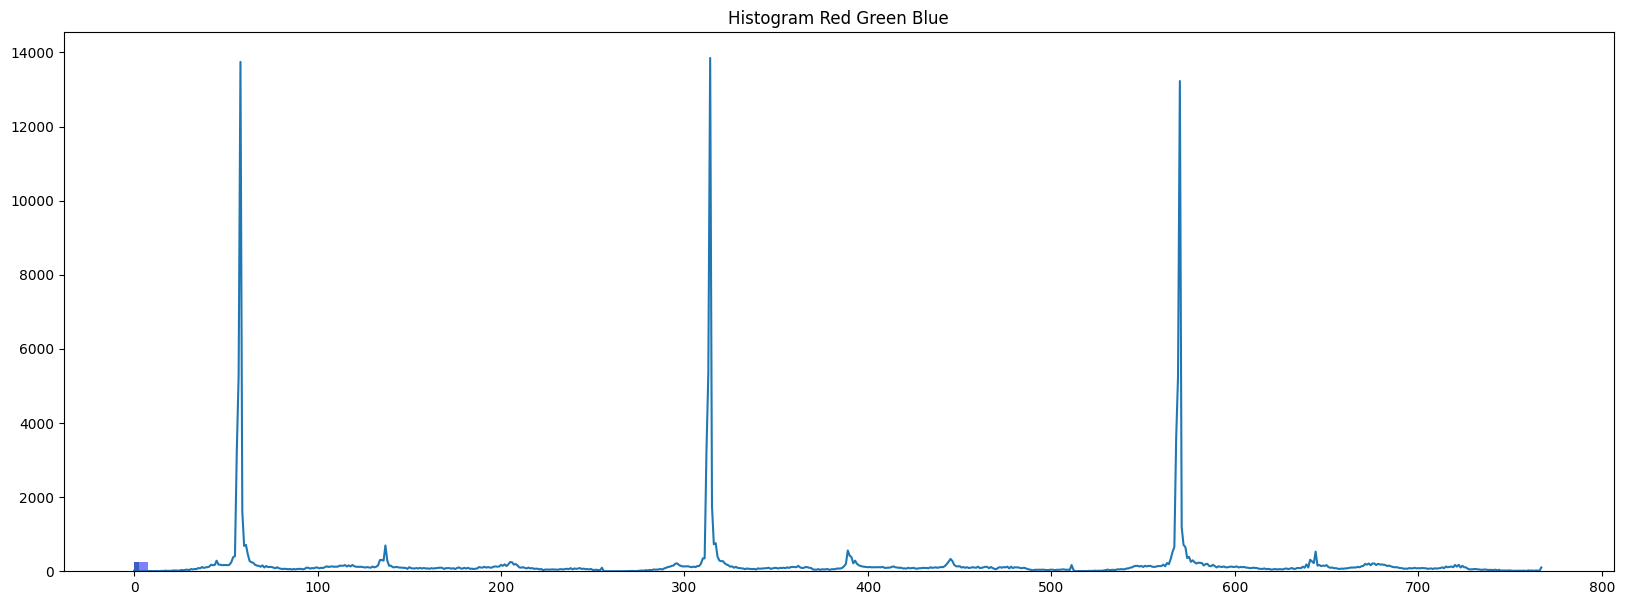

In [55]:
makeItZero()
# th = int(256/64)
temp = [0]
for y in range(0, height):
    for x in range(0, width):
        red = int(img[y][x][0])
        green = int(img[y][x][1])
        blue = int(img[y][x][2])
        red = red + 0
        green = green + 256
        blue = blue + 512
        # temp.append(green)
        hgrgb[red] += 1
        hgrgb[green] += 1
        hgrgb[blue] += 1

binsrgb = np.linspace(0, 768, 100)
binsr = np.linspace(0, 0, 100)
plt.hist(hgr, binsr, color = "red", alpha=0.5)
binsg = np.linspace(0, 256, 100)
plt.hist(hgr, binsg, color = "green", alpha=0.5)
binsb = np.linspace(0, 768, 100)
plt.hist(hgr, binsb, color = "blue", alpha=0.5)
#plt.hist(hgr, binsrgb, alpha=0.5)
plt.plot(hgrgb)
plt.title("Histogram Red Green Blue")
plt.show()        

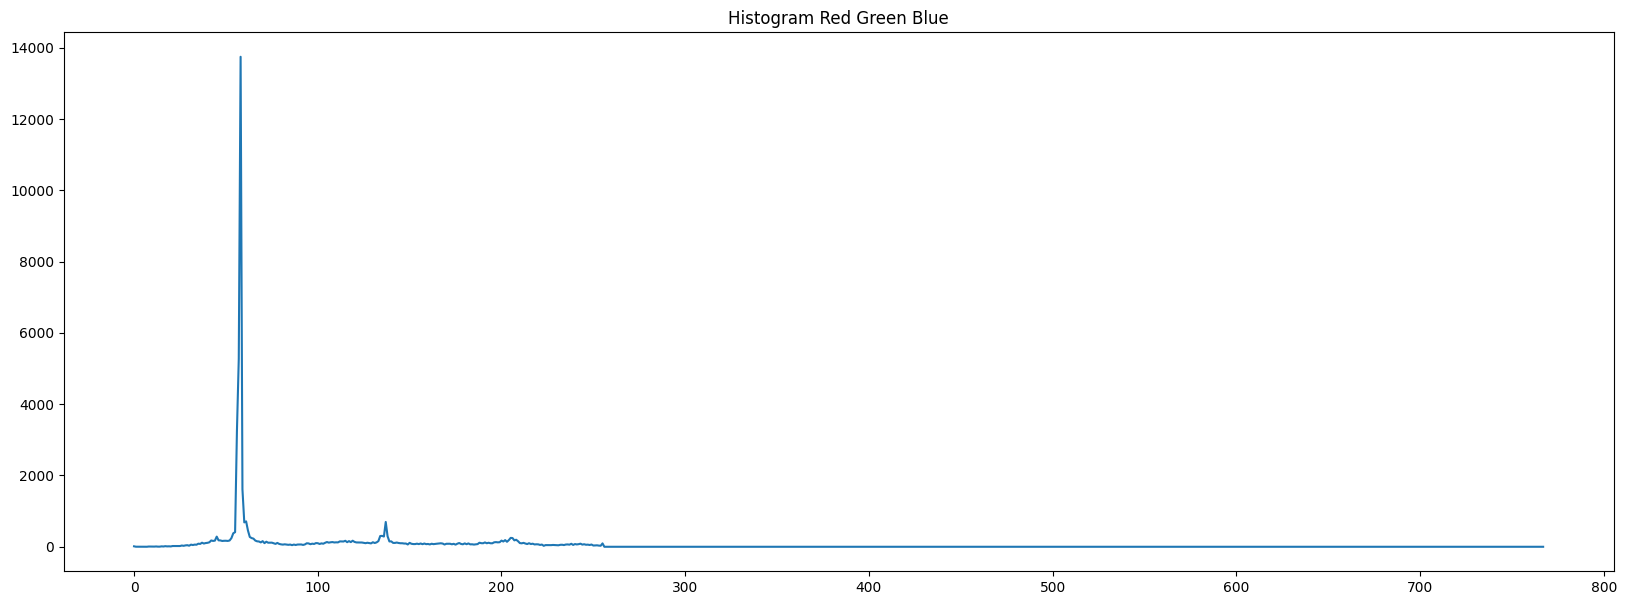

In [56]:
hist_img = cv2.calcHist([img], [0], None, [768], [0, 768])
plt.plot(hist_img)
plt.title("Histogram Red Green Blue")
plt.show()

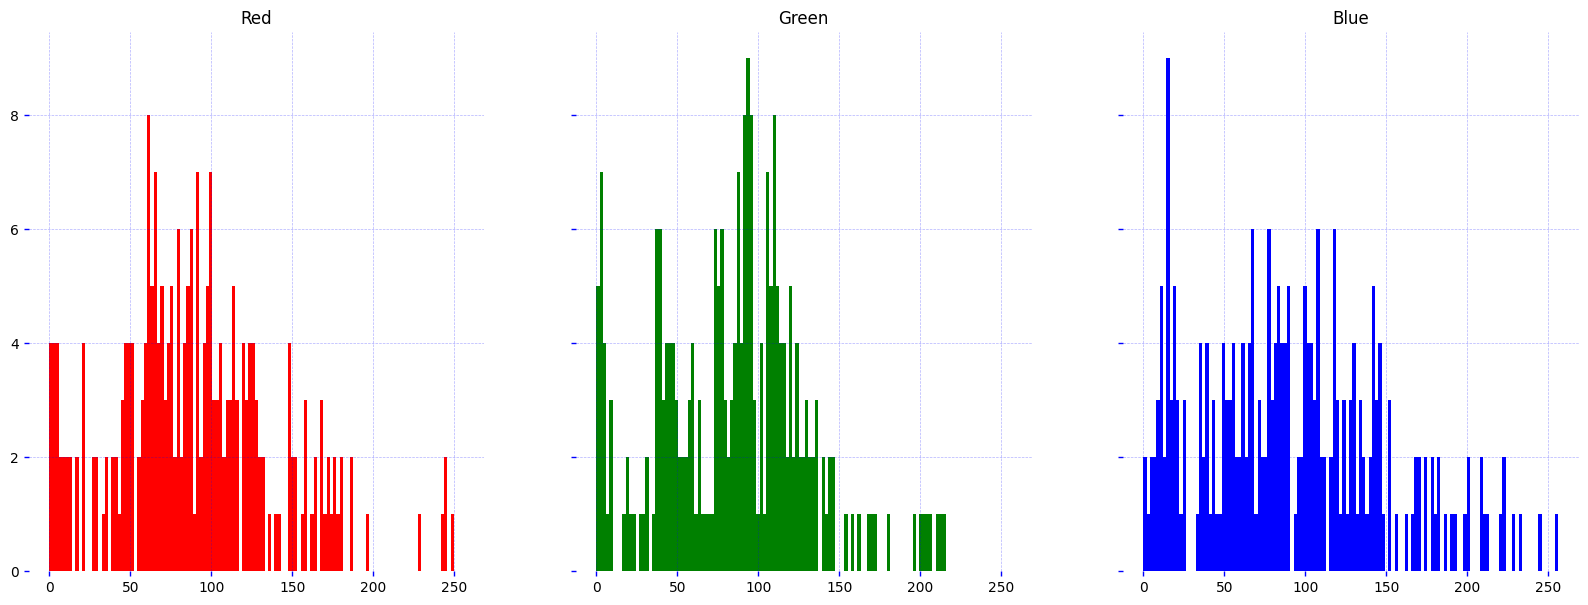

In [57]:
makeItZero()
for y in range(0, img.shape[0]):
    for x in range(0, img.shape[1]):
        red = img[y][x][0]
        green = img[y][x][1]
        blue = img[y][x][2]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1
def plot_result(red, green, blue):
    bins = np.linspace(0, 256, 128)
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    for ax in [ax1, ax2, ax3]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='1')

    ax1.set_title('Red')
    ax2.set_title('Green')
    ax3.set_title('Blue')
    ax1.hist(red, bins, color="red", alpha=1)
    ax2.hist(green, bins, color="green", alpha=1)
    ax3.hist(blue, bins, color="blue", alpha=1)

plt.rcParams['figure.figsize'] = [20, 7]
plot_result(hgr, hgg, hgb)

<font size="10">Latihan 3</font>


c:\Users\Haekala\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\Haekala\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Haekala\anaconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Haekala\anaconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\Haekala\anacond

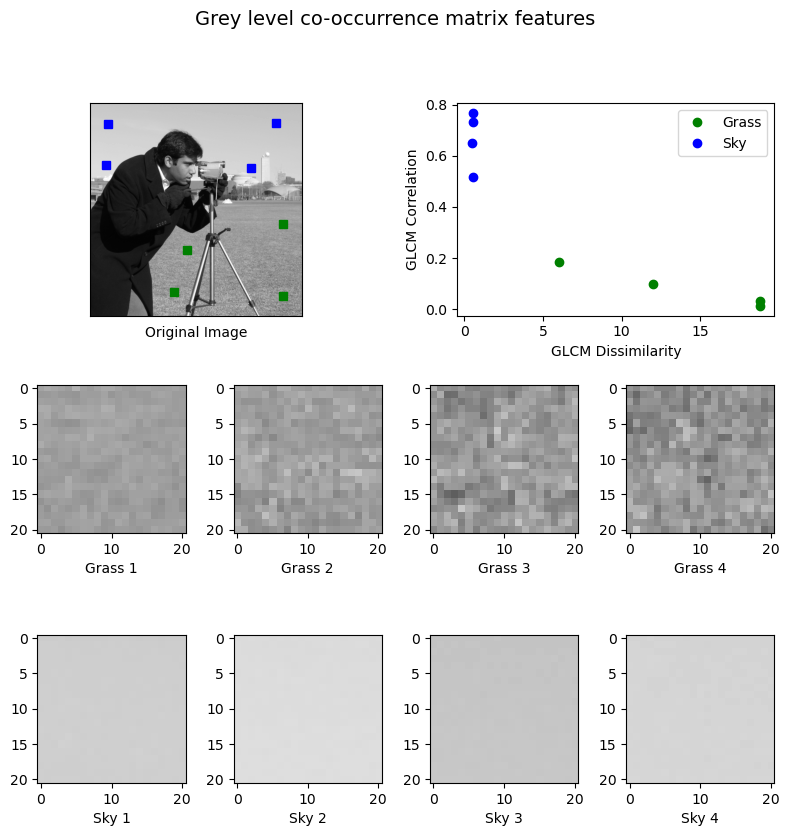

In [1]:
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage import data

PATCH_SIZE = 21
# load image
image = data.camera()
grass_locations = [(280, 454), (342, 223), (444, 192), (455, 455)]
grass_patches = []
for loc in grass_locations:
    grass_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                                loc[1]:loc[1] + PATCH_SIZE])
sky_locations = [(38, 34), (139, 28), (37, 437), (145, 379)]
sky_patches = []
for loc in sky_locations:
    sky_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                             loc[1]:loc[1] + PATCH_SIZE])

# menghitung GLCM
xs = []
ys = []
for patch in (grass_patches + sky_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

fig = plt.figure(figsize=(8, 8))
# tampilkan original image dengan lokasi patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,vmin=0, vmax=255)
for (y, x) in grass_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
for (y, x) in sky_locations:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'bs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')
# plot (dissimilarity, correlation)
ax = fig.add_subplot(3, 2, 2)
ax.plot(xs[:len(grass_patches)], ys[:len(grass_patches)], 'go',label='Grass')
ax.plot(xs[len(grass_patches):], ys[len(grass_patches):], 'bo',label='Sky')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()
# display
for i, patch in enumerate(grass_patches):
    ax = fig.add_subplot(3, len(grass_patches), len(grass_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,vmin=0, vmax=255)
    ax.set_xlabel('Grass %d' % (i + 1))
for i, patch in enumerate(sky_patches):
    ax = fig.add_subplot(3, len(sky_patches), len(sky_patches)*2 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,vmin=0, vmax=255)
    ax.set_xlabel('Sky %d' % (i + 1))

# display
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()